In [1]:
import os
os.chdir(path='../')
import scanpy as sc
import STForte.helper as stfhelper
import plotly.express as px
trial_name = "trial-Visium_FFPE_Human_Prostate_Cancer"
data_name = "Visium_FFPE_Human_Prostate_Cancer"
sc.set_figure_params(dpi=120)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/pytorch_lightning/utilities/seed.py:47: LightningDeprecationWarning: `pytorch_lightning.utilities.seed.seed_everything` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.seed.seed_everything` instead.
  rank_zero_deprecation(
Global seed set to 0


In [2]:
adata = sc.read_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata

AnnData object with n_obs × n_vars = 4371 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'STForte_Mask', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [3]:
adata_sp = sc.read_h5ad(f"./{trial_name}/outputs/sp.h5ad")
adata_sp

AnnData object with n_obs × n_vars = 17040 × 300
    obs: 'spot_instance', 'leiden_with_padding'
    uns: 'leiden_with_padding_colors', 'neighbors', 'umap'
    obsm: 'SP_ATTR_FP', 'SP_COMB', 'SP_TOPO', 'X_umap', 'spatial'
    obsp: 'A_STForte_conn', 'A_STForte_recon', 'connectivities', 'distances'

- Cancer Region: C2, C6, C1
- Fibrous/Normal Tissue: C3, C4, C8, C5 (Closer to carcinoma)
- Normal Gland: C7, C9, C11
- Nerve: C10

In [4]:
cat_name = {
    'C1': "Invasive Carcinoma",
    'C2': "Invasive Carcinoma",
    'C3': "Fibrous/Muscle",
    'C4': "Fibrous/Muscle",
    'C5': "Fibrous/Muscle",
    'C6': "Invasive Carcinoma",
    'C7': "Gland",
    'C8': "Fibrous/Muscle",
    'C9': "Gland",
    'C10': "Nerve",
    'C11': "Gland",
}
adata.obs["region_refined"] = adata.obs["leiden"].map(cat_name).astype('category')
adata.obs["region_refined"] = adata.obs["region_refined"].cat.reorder_categories(["Invasive Carcinoma", "Fibrous/Muscle", "Gland", "Nerve"])
adata_sp.obs["region_refined_padding"] = adata_sp.obs["leiden_with_padding"].map(cat_name).astype('category')
adata_sp.obs["region_refined_padding"] = adata_sp.obs["region_refined_padding"].cat.reorder_categories(["Invasive Carcinoma", "Fibrous/Muscle", "Gland", "Nerve"])

In [5]:
color_map = {
    'C1': "#DC143C",
    'C2': "#B22233",
    'C3': "#1E90FF",
    'C4': "#7B68EE",
    'C5': "#0000CD",
    'C6': "#FF4500",
    'C7': "#FF69B4",
    'C8': "#4169E1",
    'C9': "#228B22",
    'C10': "#FFD700",
    'C11': "#3CB371",
}
palette = [color_map[key] for key in adata.obs["leiden"].cat.categories]

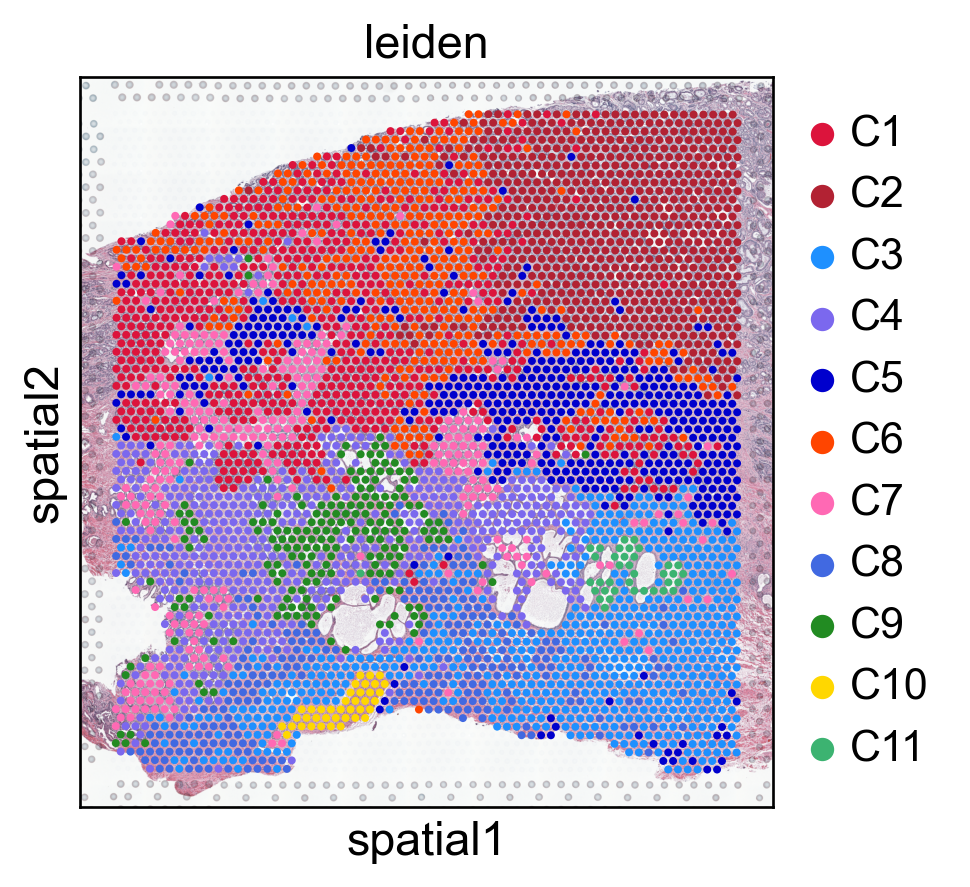

In [6]:
sc.pl.spatial(adata, color=['leiden'], palette=palette, size=1.25)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


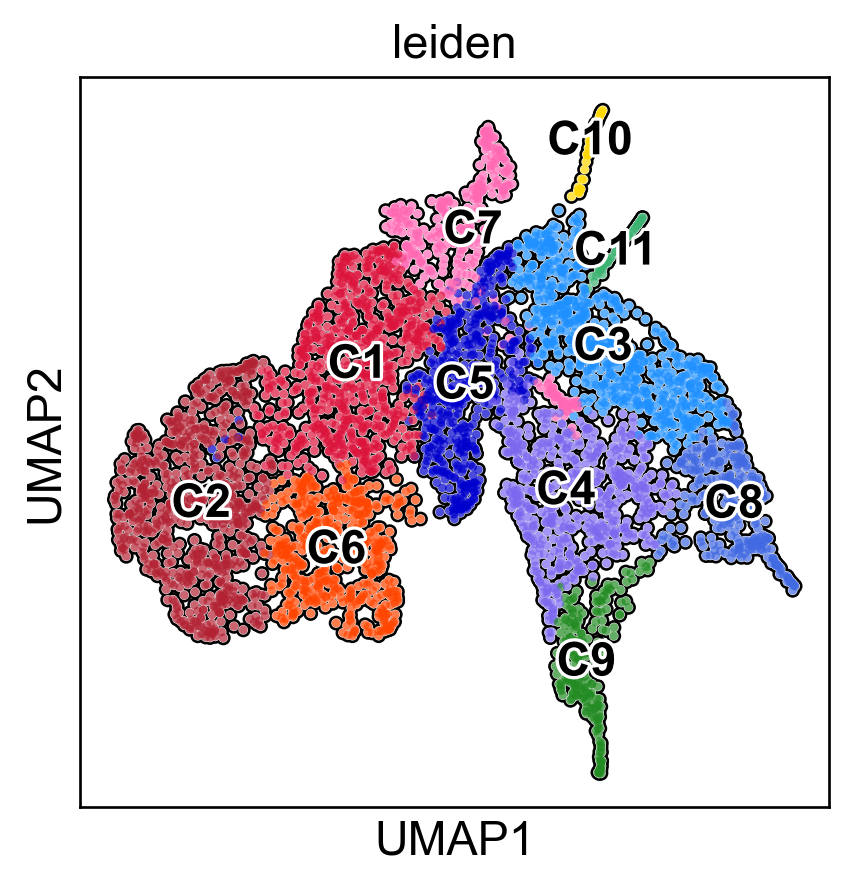

In [7]:
sc.pl.umap(adata, color=['leiden'],
           legend_loc="on data", legend_fontoutline=2, add_outline=True,
           palette=palette)

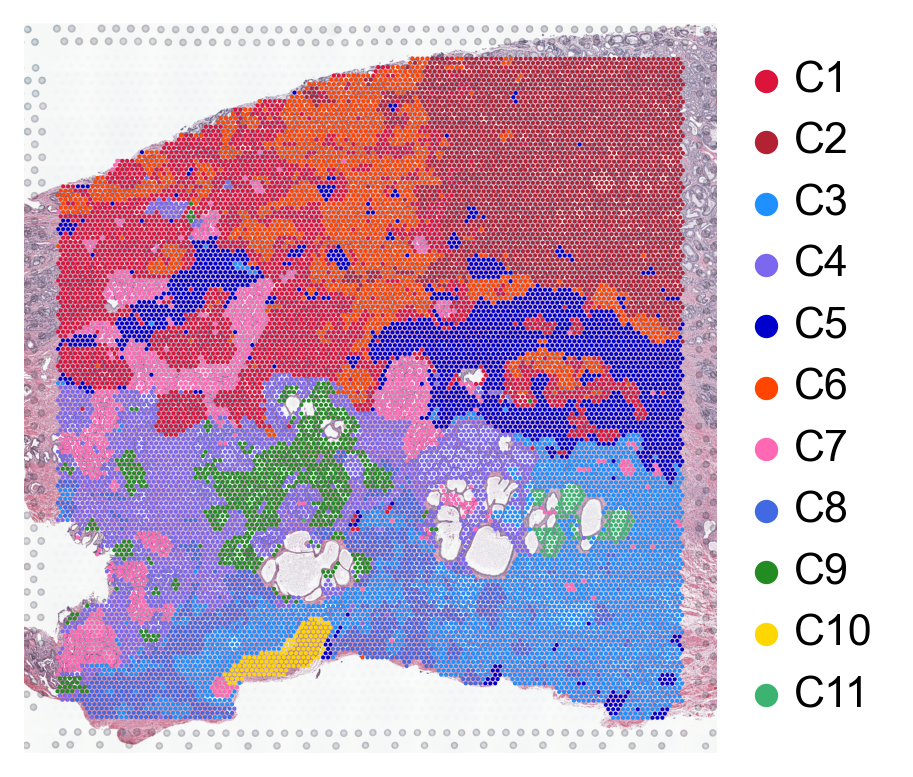

In [8]:
sc.pl.spatial(adata_sp, color=['leiden_with_padding'], size=0.625,
                  frameon=False,
                  img=adata.uns['spatial'][data_name]['images']['hires'], title="",
                  spot_size=adata.uns['spatial'][data_name]['scalefactors']['spot_diameter_fullres'], 
                  scale_factor=adata.uns['spatial'][data_name]['scalefactors']['tissue_hires_scalef'],
                  palette=palette,
                  legend_fontoutline=4,
                  )

In [9]:
adata.uns['leiden_colors'] = [color_map[key] for key in adata.obs["leiden"].cat.categories]
adata.uns['leiden_color_map'] = color_map
adata

AnnData object with n_obs × n_vars = 4371 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'STForte_Mask', 'leiden', 'region_refined'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'spatial', 'umap', 'leiden_color_map'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [10]:
adata_sp.uns['leiden_with_padding_colors'] = [color_map[key] for key in adata.obs["leiden"].cat.categories]
adata_sp.uns['leiden_with_padding_color_map'] = color_map
adata_sp

AnnData object with n_obs × n_vars = 17040 × 300
    obs: 'spot_instance', 'leiden_with_padding', 'region_refined_padding'
    uns: 'leiden_with_padding_colors', 'neighbors', 'umap', 'leiden_with_padding_color_map'
    obsm: 'SP_ATTR_FP', 'SP_COMB', 'SP_TOPO', 'X_umap', 'spatial'
    obsp: 'A_STForte_conn', 'A_STForte_recon', 'connectivities', 'distances'

In [11]:
adata.write_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata_sp.write_h5ad(f"./{trial_name}/outputs/sp.h5ad")